In [26]:
# !pip install pycaret
# # autoML(pycaret) 설치 오류 발생 : ERROR: Could not build wheels for lightgbm, which is required to install pyproject.toml-based projects
# !pip install --upgrade pip
# !pip install \
#    --no-binary lightgbm \
#    --config-settings=cmake.define.USE_OPENMP=OFF \
#    'lightgbm>=4.0.0'
# !pip install shap

In [27]:
# Standard
import pandas as pd
import numpy as np
# Pycaret
from pycaret.classification import *
# Plots
from plotly.offline import iplot
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import seaborn as sns
import interpret
# Sklearn tools
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import *
# Extras
from datetime import date
import warnings
warnings.filterwarnings("ignore")


In [49]:
import pandas as pd
DATA_DIR = "../../data/"
df = pd.read_pickle(DATA_DIR + 'base_dataset_numerical_minmax.pkl')


# df = df.drop(['Total_Trans_Ct'], axis=1)
# df = df.drop(['Total_Trans_Amt'], axis=1)
# df = df.drop(['Months_on_book'], axis=1)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer_Age               10127 non-null  float64
 1   Dependent_count            10127 non-null  float64
 2   Education_Level            10127 non-null  float64
 3   Income_Category            10127 non-null  float64
 4   Card_Category              10127 non-null  float64
 5   Months_on_book             10127 non-null  float64
 6   Total_Relationship_Count   10127 non-null  float64
 7   Months_Inactive_12_mon     10127 non-null  float64
 8   Contacts_Count_12_mon      10127 non-null  float64
 9   Credit_Limit               10127 non-null  float64
 10  Total_Revolving_Bal        10127 non-null  float64
 11  Total_Amt_Chng_Q4_Q1       10127 non-null  float64
 12  Total_Trans_Amt            10127 non-null  float64
 13  Total_Trans_Ct             10127 non-null  flo

In [88]:
random_seed = 0
train_size = 0.7
fix_imbalance = False # True : upsampling
fix_imbalance_method = 'SMOTE' # default method : SMOTE. Ignored when fix_imbalance=False

stp = setup(data=df, target='Attrition_Flag', \
    train_size=train_size, \
    fix_imbalance=fix_imbalance, \
    fix_imbalance_method=fix_imbalance_method, \
    session_id=random_seed)

,Description,Value
0,Session id,0
1,Target,Attrition_Flag
2,Target type,Binary
3,Original data shape,"(10127, 21)"
4,Transformed data shape,"(10127, 21)"
5,Transformed train set shape,"(7088, 21)"
6,Transformed test set shape,"(3039, 21)"
7,Numeric features,20
8,Preprocess,True
9,Imputation type,simple


In [103]:
predict_model(best_model)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9701,0.9927,0.8648,0.9441,0.9027,0.8850,0.8862


,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_Male,Marital_Status_Uneducated,Marital_Status_Single,Marital_Status_Divorced,Attrition_Flag,prediction_label,prediction_score
4872,0.297872,0.6,0.2,0.75,0.0,0.488372,0.0,0.500000,0.666667,0.854857,...,0.224806,0.092892,0.000000,1,0,1,0,1,1,0.9991
2562,0.234043,0.2,0.4,0.50,0.0,0.139535,1.0,0.166667,0.333333,0.529441,...,0.372093,0.176898,0.066066,1,1,0,0,0,0,0.9989
7306,0.319149,0.6,0.2,0.25,0.0,0.418605,0.4,0.500000,0.333333,0.000000,...,0.449612,0.166667,0.635636,0,0,1,0,0,0,0.9995
7393,0.446809,0.6,0.6,0.00,0.0,0.534884,0.4,0.333333,0.166667,0.032097,...,0.596899,0.218632,0.468468,0,0,1,0,0,0,0.9999
7477,0.191489,0.2,0.6,0.25,0.0,0.372093,0.6,0.500000,0.500000,0.000000,...,0.550388,0.204900,0.672673,0,0,1,0,0,0,0.9982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4458,0.297872,0.6,0.4,0.75,0.0,0.418605,0.6,0.333333,0.500000,0.784084,...,0.387597,0.192246,0.055055,1,0,0,1,0,0,0.9993
123,0.446809,0.6,0.2,0.25,0.0,0.651163,0.6,0.500000,0.500000,0.071036,...,0.286822,0.102854,0.407407,0,0,1,0,0,0,0.9887
3849,0.382979,0.2,0.4,0.00,0.0,0.534884,0.4,0.500000,0.500000,0.034153,...,0.581395,0.146742,0.624625,0,1,0,0,0,0,0.9995
322,0.531915,0.4,0.0,0.00,0.0,0.581395,0.6,0.166667,0.333333,0.248194,...,0.093023,0.471190,0.200200,0,0,0,1,0,0,0.9959


In [102]:
predictions = predict_model(best_model, data=df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9910,0.9983,0.9594,0.9842,0.9717,0.9663,0.9664


In [101]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9715,0.9927,0.8929,0.9280,0.9096,0.8927,0.8933,0.0230
xgboost,Extreme Gradient Boosting,0.9688,0.9912,0.8771,0.9255,0.9002,0.8817,0.8825,0.0230
gbc,Gradient Boosting Classifier,0.9660,0.9892,0.8455,0.9376,0.8886,0.8686,0.8706,0.2510
rf,Random Forest Classifier,0.9619,0.9875,0.8209,0.9341,0.8736,0.8513,0.8539,0.1160
ada,Ada Boost Classifier,0.9581,0.9838,0.8376,0.8956,0.8649,0.8402,0.8413,0.0590
dt,Decision Tree Classifier,0.9386,0.8860,0.8086,0.8115,0.8090,0.7725,0.7732,0.0120
et,Extra Trees Classifier,0.9367,0.9795,0.6576,0.9268,0.7687,0.7333,0.7481,0.0750
lda,Linear Discriminant Analysis,0.9018,0.9242,0.6023,0.7396,0.6633,0.6065,0.6113,0.0070
lr,Logistic Regression,0.9014,0.9223,0.5268,0.7893,0.6315,0.5772,0.5932,0.0170
svm,SVM - Linear Kernel,0.9003,0.0000,0.4970,0.8198,0.6088,0.5568,0.5847,0.0070


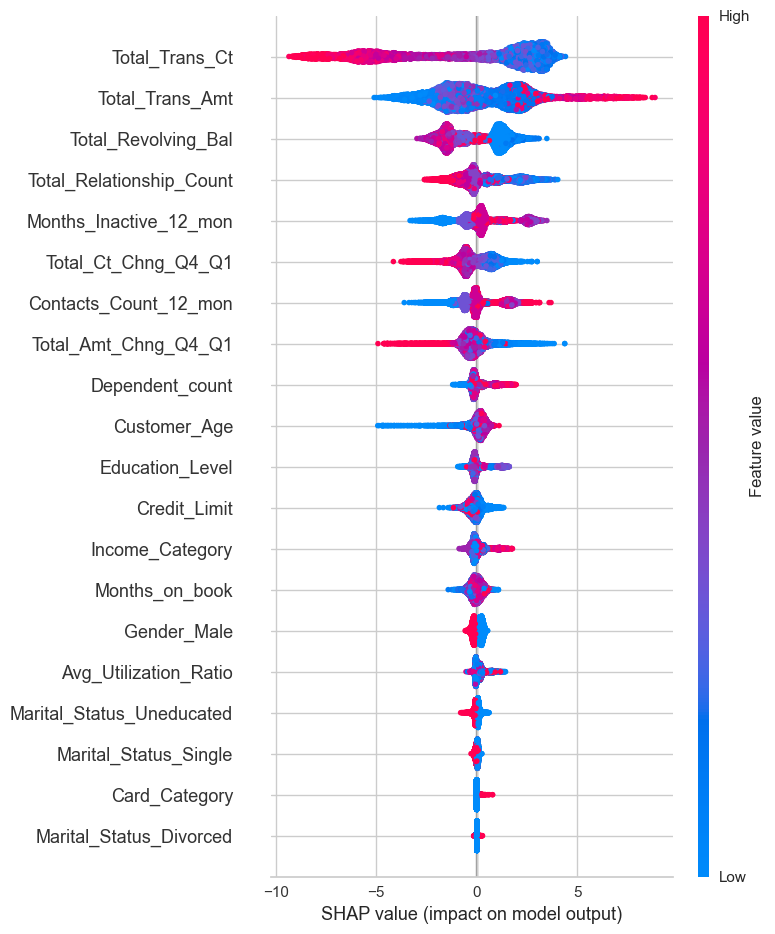

In [53]:
interpret_model(best_model, use_train_data=True)

In [54]:
interpret_model(best_model, plot='reason', observation=240) # observation means index from the test set.

In [90]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [91]:
xgb_model = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9690,0.9910,0.9035,0.9035,0.9035,0.8850,0.8850
1,0.9746,0.9902,0.9123,0.9286,0.9204,0.9053,0.9053
2,0.9718,0.9959,0.9035,0.9196,0.9115,0.8947,0.8948
3,0.9619,0.9921,0.8333,0.9223,0.8756,0.8532,0.8547
4,0.9704,0.9898,0.8509,0.9604,0.9023,0.8849,0.8872
5,0.9746,0.9901,0.9035,0.9364,0.9196,0.9046,0.9048
6,0.9746,0.9931,0.9123,0.9286,0.9204,0.9053,0.9053
7,0.9647,0.9849,0.8333,0.9406,0.8837,0.8630,0.8652
8,0.9576,0.9919,0.8496,0.8807,0.8649,0.8397,0.8399


In [82]:
import lightgbm as lgb
# lgb_model = lgb.LGBMClassifier()
# lgb_model.fit(X_train, y_train)
xgb_model.predict_proba()
# y_pred = xgb_model.predict()  # 이진 분류의 경우 0 또는 1을 반환
# y_pred_proba = xgb_model.predict_proba()  # 예측 확률을 추출
# class_0_probabilities = y_pred_proba[:, 0]


TypeError: predict_proba() missing 1 required positional argument: 'X'

In [92]:
# result = pull(xgb_model)
print(predict_model(xgb_model).iloc[:,-3:])
# print(type(result))
# print(result)
# print(result.shape)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9691,0.9929,0.8607,0.9417,0.8994,0.8811,0.8824


      Attrition_Flag  prediction_label  prediction_score
4872               1                 1            1.0000
2562               0                 0            0.9999
7306               0                 0            0.9999
7393               0                 0            1.0000
7477               0                 0            0.9994
...              ...               ...               ...
4458               0                 0            0.9999
123                0                 0            0.9963
3849               0                 0            1.0000
322                0                 0            0.9993
9224               1                 1            0.9759

[3039 rows x 3 columns]


In [71]:
import numpy as np

def find_break_even_point(accuracy, recall, precision, loss_unit):
    # FP 계산
    false_positives = np.maximum(((1 - accuracy) / (1 / precision - 1)), 0)  # 음수값을 방지하기 위해 0 이하의 값을 0으로 설정
    print(false_positives)
    # TN 계산
    true_negatives = loss_unit / (1 + false_positives)

    # FN 계산
    false_negatives = np.maximum(((1 - recall) * (true_negatives / recall - true_negatives)), 0)  # 음수값을 방지하기 위해 0 이하의 값을 0으로 설정

    # 손익분기점 투자금 계산
    investment = true_negatives + false_negatives

    return investment


In [72]:
loss = 100
auc = result.loc['Mean', 'AUC']
recall = result.loc['Mean', 'Recall']
prec = result.loc['Mean', 'Prec.']

test = (auc, recall, prec, loss)
find_break_even_point(*test)

0.08596943291839598


93.20427137212322

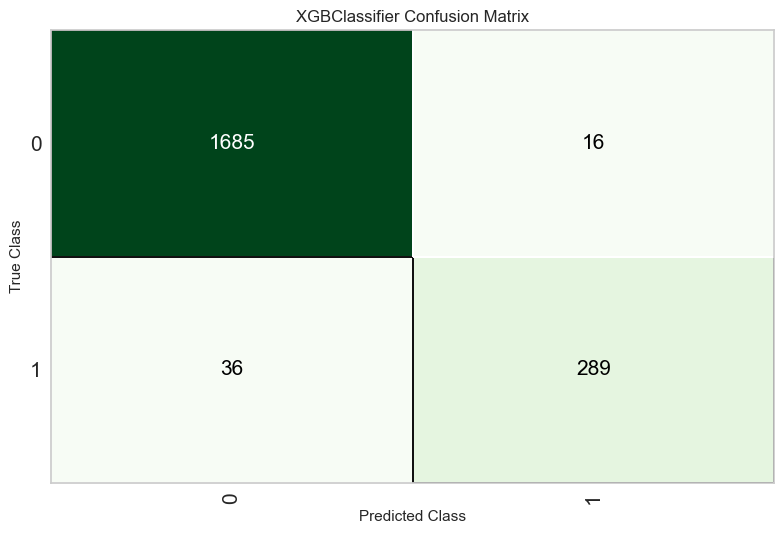

In [60]:
plot_model(xgb_model, plot='confusion_matrix')

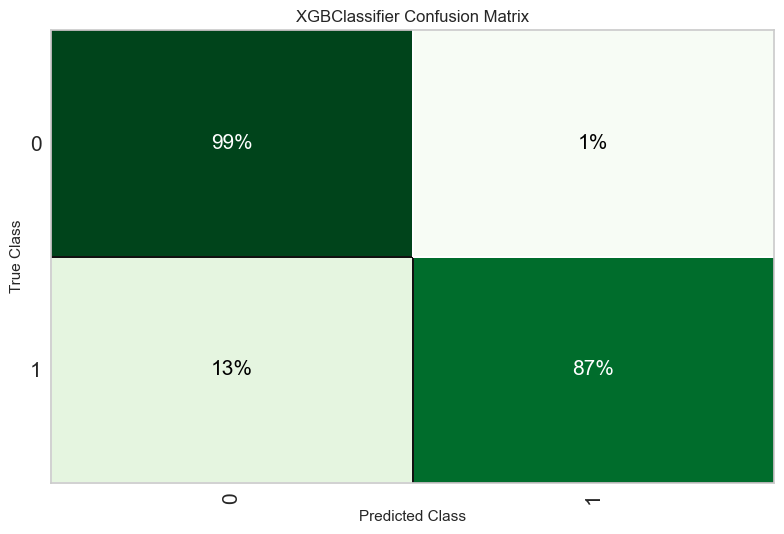

In [43]:
plot_model(xgb_model, plot='confusion_matrix', plot_kwargs = {'percent' : True})

In [44]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [61]:
tune_xgb_model = tune_model(xgb_model, optimize='Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.1615,0.9685,1.0000,0.1615,0.2781,0.0000,0.0000
1,0.1605,0.9682,1.0000,0.1605,0.2766,0.0000,0.0000
2,0.1605,0.9588,1.0000,0.1605,0.2766,0.0000,0.0000
3,0.1605,0.9686,1.0000,0.1605,0.2766,0.0000,0.0000
4,0.1605,0.9654,1.0000,0.1605,0.2766,0.0000,0.0000
5,0.1605,0.9714,1.0000,0.1605,0.2766,0.0000,0.0000
6,0.1605,0.9626,1.0000,0.1605,0.2766,0.0000,0.0000
7,0.1605,0.9732,1.0000,0.1605,0.2766,0.0000,0.0000
8,0.1605,0.9675,1.0000,0.1605,0.2766,0.0000,0.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [48]:
result = pull(tune_xgb_model)
loss = 100
auc = result.loc['Mean', 'AUC']
recall = result.loc['Mean', 'Recall']
prec = result.loc['Mean', 'Prec.']

test = (auc, recall, prec, loss)
find_break_even_point(*test)

99.41184032328783

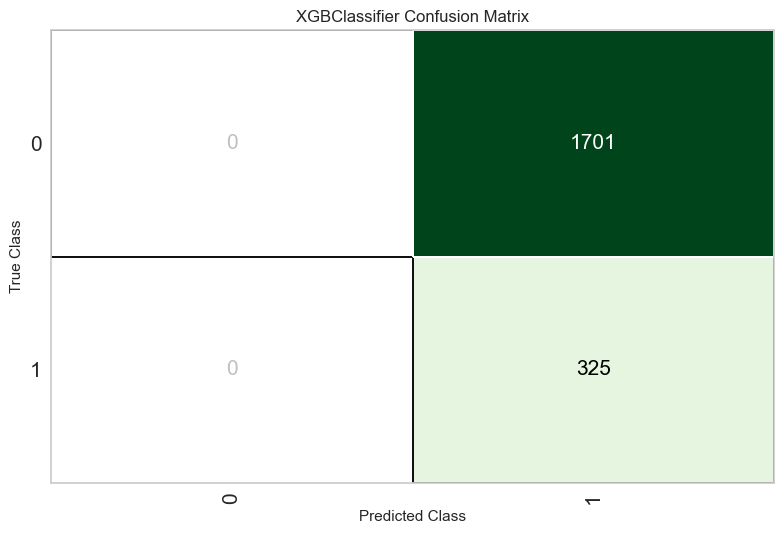

In [47]:
plot_model(tune_xgb_model, plot='confusion_matrix')

In [ ]:
predict_model(tune_xgb_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9699,0.9925,0.8738,0.9342,0.9030,0.8852,0.8859


,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_Male,Marital_Status_Uneducated,Marital_Status_Single,Marital_Status_Divorced,Attrition_Flag,prediction_label,prediction_score
8708,0.583058,-0.266547,-0.657196,-0.281087,-0.250587,0.008965,-1.166148,-0.337598,-1.315636,0.678678,...,1.241566,-0.500778,-0.746863,-0.943436,1.037331,-0.892124,-0.285046,0,0,0.9997
9115,1.206778,-1.806378,-0.657196,2.035710,-0.250587,1.636809,-1.166148,-0.337598,-0.411616,2.848054,...,0.559886,0.427504,-0.772255,1.059956,1.037331,-0.892124,-0.285046,0,1,0.8259
1960,2.204730,-1.806378,0.159721,-1.053353,-0.250587,2.137684,-0.522785,0.651940,1.396423,-0.720479,...,-1.186920,-0.714997,1.868509,1.059956,1.037331,-0.892124,-0.285046,0,0,0.9917
6540,-0.789126,1.273283,0.159721,-1.053353,-0.250587,-1.368442,1.407306,-0.337598,-1.315636,-0.640377,...,0.389466,0.209084,1.621844,-0.943436,-0.964012,1.120920,-0.285046,0,0,1.0000
9309,-0.040662,-0.266547,0.159721,2.035710,2.745506,0.384621,-1.166148,-0.337598,0.492404,2.848054,...,2.093666,1.065960,-0.852058,1.059956,1.037331,-0.892124,-0.285046,0,0,0.9985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,-1.787077,-1.806378,-1.474113,-0.281087,-0.250587,0.008965,1.407306,0.651940,-0.411616,0.017500,...,-0.590450,-0.496578,-0.997155,-0.943436,1.037331,-0.892124,-0.285046,1,0,0.7849
5687,-1.537589,-0.266547,0.976638,-1.053353,-0.250587,-1.994536,0.763943,-0.337598,0.492404,-0.651050,...,0.133835,-0.223554,1.012437,-0.943436,-0.964012,1.120920,-0.285046,0,0,0.9995
9232,-0.165406,2.043199,-1.474113,1.263444,-0.250587,-0.241473,-1.166148,0.651940,0.492404,-0.571827,...,-0.590450,-0.702396,1.661746,1.059956,1.037331,-0.892124,-0.285046,1,1,0.9991
2704,0.208826,0.503368,0.159721,1.263444,-0.250587,0.259402,-0.522785,0.651940,0.492404,2.516309,...,0.432071,0.309893,-0.997155,1.059956,1.037331,-0.892124,-0.285046,0,0,0.9992


In [ ]:
model_final = finalize_model(tune_xgb_model)

In [ ]:
print(model_final)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Customer_Age', 'Dependent_count',
                                             'Education_Level',
                                             'Income_Category', 'Card_Category',
                                             'Months_on_book',
                                             'Total_Relationship_Count',
                                             'Months_Inactive_12_mon',
                                             'Contacts_Count_12_mon',
                                             'Credit_Limit',
                                             'Total_Revolving_Bal',
                                             'Total_Amt_Chng_Q4_Q1',
                                             'Tota...
                               importance_type=None,
                               interaction_constraints=None, learn

In [ ]:
model_final

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Customer_Age', 'Dependent_count',
                                             'Education_Level',
                                             'Income_Category', 'Card_Category',
                                             'Months_on_book',
                                             'Total_Relationship_Count',
                                             'Months_Inactive_12_mon',
                                             'Contacts_Count_12_mon',
                                             'Credit_Limit',
                                             'Total_Revolving_Bal',
                                             'Total_Amt_Chng_Q4_Q1',
                                             'Tota...
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=-1,
                               num_parallel_tree=None,
                               objective='binary:logistic', ...))],
         verbose=False)

프로모션, 마케팅 투자비용


# 컬럼 제거 없이

In [ ]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
evaluate_model(best_model) # feature 변경 없ㅇ

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…